# Linear Regression in Python

Linear regression is a supervised machine learning model used to predict a continous target variable. In this task we aim to predict the medical cost given 8 independent variables

## Description of Data

**Variables**
- age (numeric) – Patient’s age
- bmi (numeric) – Body Mass Index
- blood_pressure (numeric) – Systolic blood pressure
- cholesterol_level (numeric) – Cholesterol level
- smoker (categorical) – Whether the patient smokes (Yes/No)
- exercise_freq (numeric) – Number of exercise sessions per week
- diabetes (categorical) – Whether the patient has diabetes (Yes/No)
- region (categorical) – Patient's residential region (North, South, East, West)
- sex - patients sex (M,F)
- medical_cost (numeric, target) – Annual medical cost

In [1]:
# Load the data and all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
%matplotlib inline

# Load the dataset healthcare_data and sheet healthcare_data call the df health_data
health_data = pd.read_excel('healthcare_data.xlsx', sheet_name='healthcare_data')

# view the first 5 rows of the dataset
health_data.head()

,age,bmi,blood_pressure,cholesterol_level,smoker,exercise_freq,diabetes,region,medical_cost,sex
0,58,30.8,154,203,No,3,No,North,12401.03,M
1,71,29.7,110,217,No,3,No,West,11387.86,M
2,48,39.2,155,182,No,4,No,East,12325.34,M
3,34,36.7,158,291,No,6,No,East,11256.32,F
4,62,34.6,116,170,No,3,No,East,11404.76,M


## Explore the data - EDA

- Draw some graphs
- Check distribution of the data


In [2]:
# shape of data
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                100 non-null    int64  
 1   bmi                100 non-null    float64
 2   blood_pressure     100 non-null    int64  
 3   cholesterol_level  100 non-null    int64  
 4   smoker             100 non-null    object 
 5   exercise_freq      100 non-null    int64  
 6   diabetes           100 non-null    object 
 7   region             100 non-null    object 
 8   medical_cost       100 non-null    float64
 9   sex                100 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.9+ KB


### Numeric variables
We can get discribution of numeric variables

In [3]:
health_data.describe()

,age,bmi,blood_pressure,cholesterol_level,exercise_freq,medical_cost
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.580000,28.894000,130.070000,220.470000,3.280000,12606.058000
std,18.031499,5.824206,17.785623,43.603692,1.959592,3108.504535
min,21.000000,18.500000,100.000000,153.000000,0.000000,7673.880000
25%,34.000000,24.150000,116.750000,182.000000,1.000000,10312.700000
50%,48.000000,28.800000,130.500000,209.000000,4.000000,11872.820000
75%,66.000000,33.175000,147.000000,260.750000,5.000000,14280.615000
max,79.000000,40.000000,159.000000,299.000000,6.000000,21089.570000


Text(0.5, 0, 'Medical Cost')

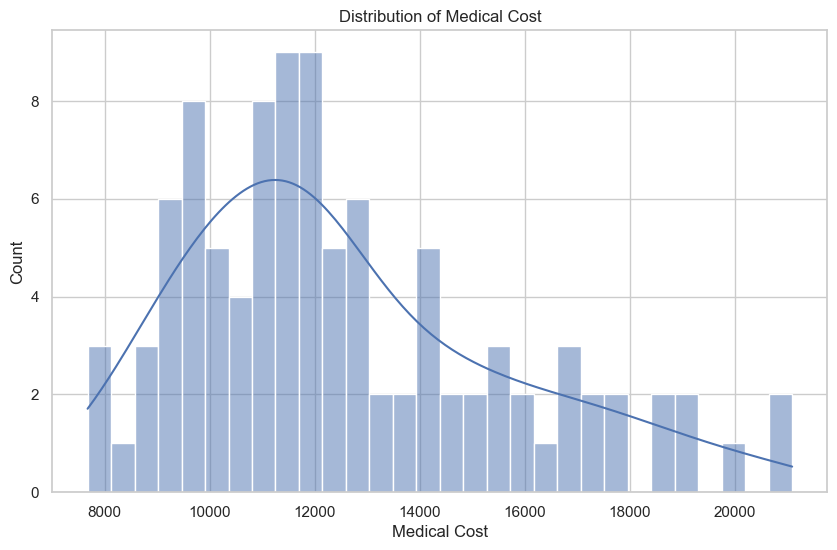

In [ ]:
# distribution of the target variable (medical_cost) using a histogram and set kde = True
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(health_data['medical_cost'], kde=True, bins=30)
plt.title('Distribution of Medical Cost')
plt.xlabel('Medical Cost')

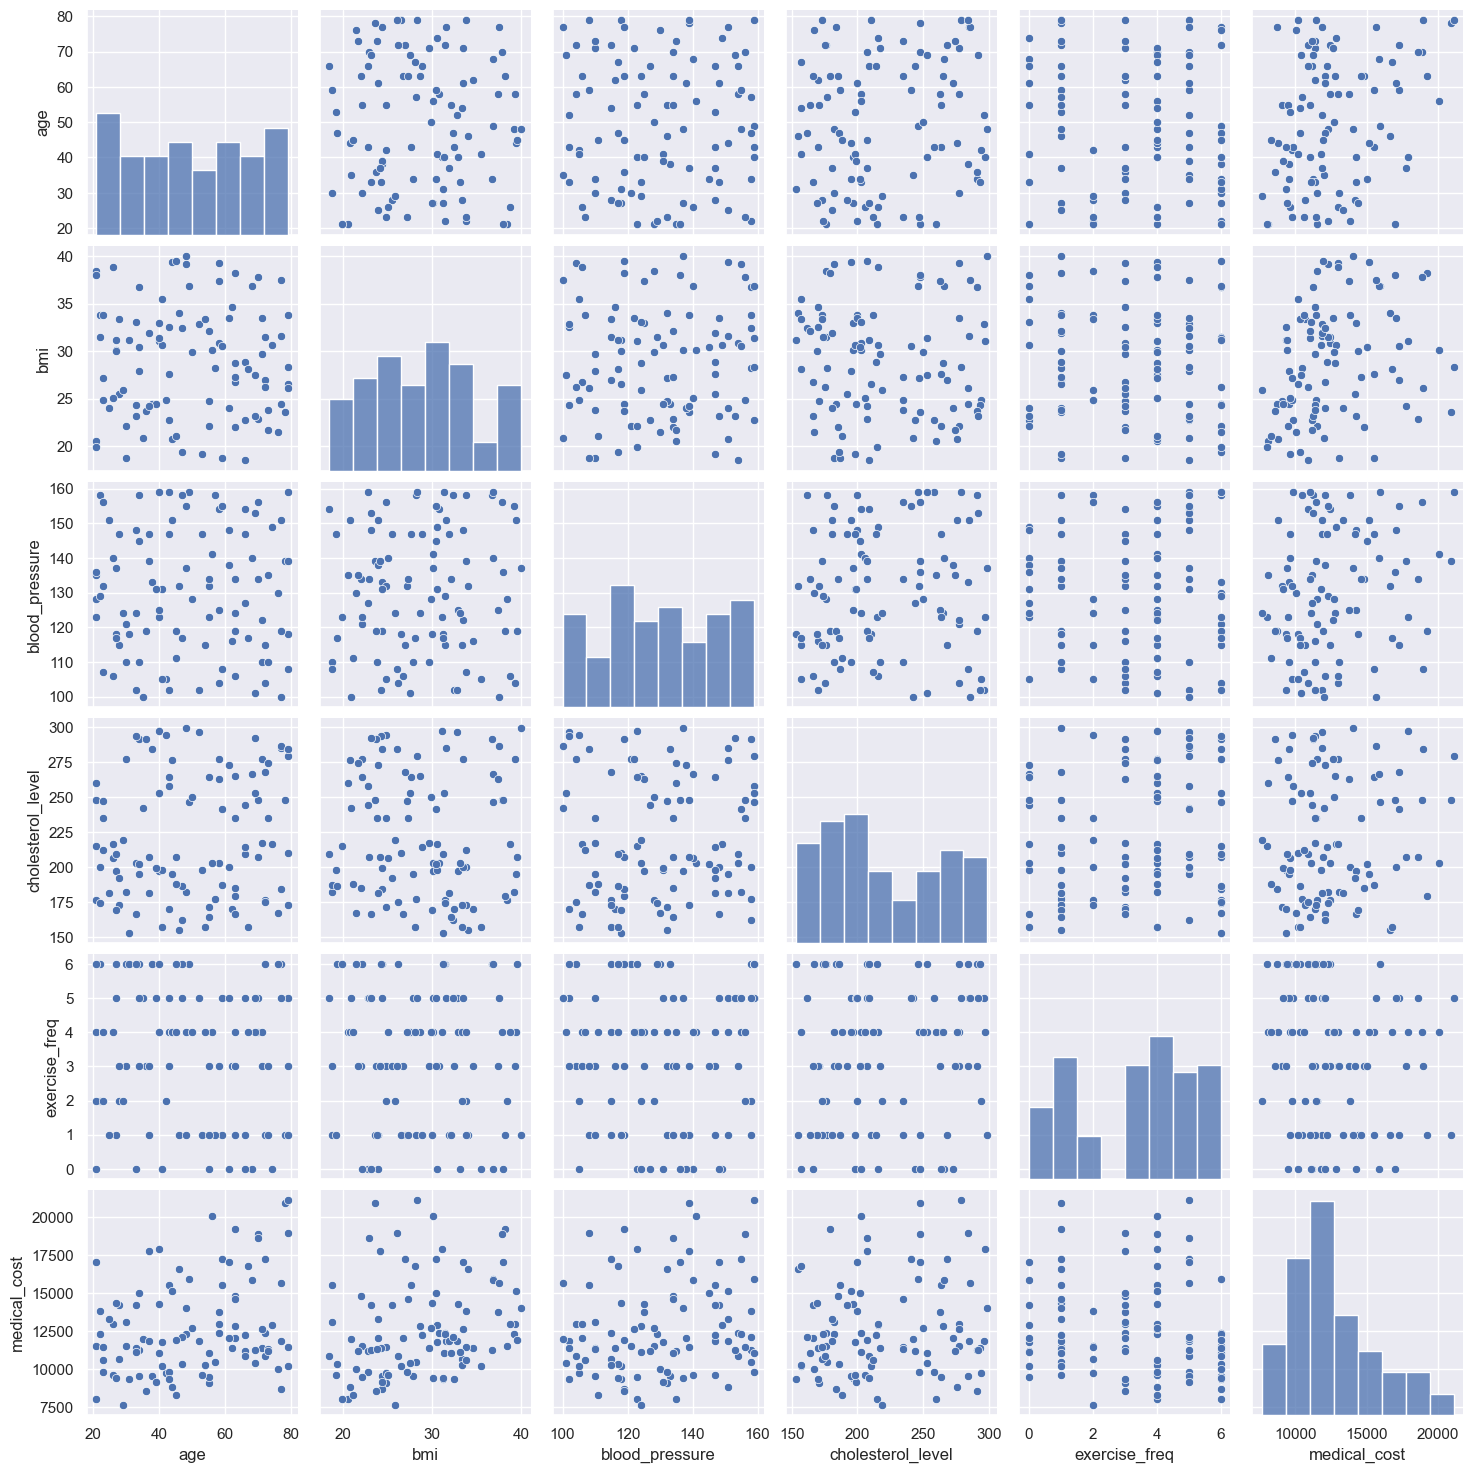

In [6]:
# Pairplot
sns.set_style('darkgrid')
sns.pairplot(health_data)

In [7]:
# correlation matrix for numric variables 
# select all numreic vars that is drop sex and region
health_data_numeric = health_data.copy()
health_data_numeric.drop(['sex', 'region','smoker', 'diabetes'], axis=1, inplace=True)
health_data_numeric.head()

,age,bmi,blood_pressure,cholesterol_level,exercise_freq,medical_cost
0,58,30.8,154,203,3,12401.03
1,71,29.7,110,217,3,11387.86
2,48,39.2,155,182,4,12325.34
3,34,36.7,158,291,6,11256.32
4,62,34.6,116,170,3,11404.76


In [8]:
# correlation table
health_data_numeric.corr()

,age,bmi,blood_pressure,cholesterol_level,exercise_freq,medical_cost
age,1.000000,-0.037689,-0.025577,0.135034,-0.073537,0.306285
bmi,-0.037689,1.000000,0.035586,-0.049273,-0.051184,0.275119
blood_pressure,-0.025577,0.035586,1.000000,0.043395,-0.040274,0.203546
cholesterol_level,0.135034,-0.049273,0.043395,1.000000,0.117606,0.113099
exercise_freq,-0.073537,-0.051184,-0.040274,0.117606,1.000000,-0.146064
medical_cost,0.306285,0.275119,0.203546,0.113099,-0.146064,1.000000


Text(0.5, 1.0, 'Correlation Matrix of Numeric Variables')

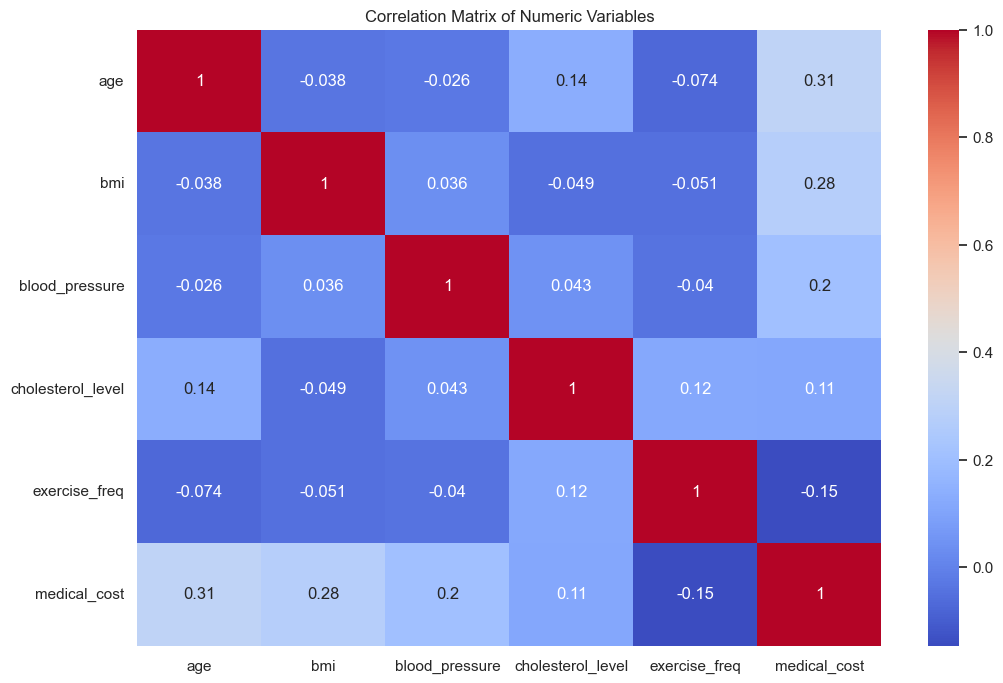

In [9]:
# draw the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(health_data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')

In [10]:
health_data.groupby('region').size()

region
East     28
North    24
South    26
West     22
dtype: int64

In [11]:
health_data.groupby('diabetes').size()

diabetes
No     80
Yes    20
dtype: int64

In [12]:
health_data.groupby('smoker').size()

smoker
No     76
Yes    24
dtype: int64

In [13]:
health_data.groupby('sex').size()

sex
F    51
M    49
dtype: int64

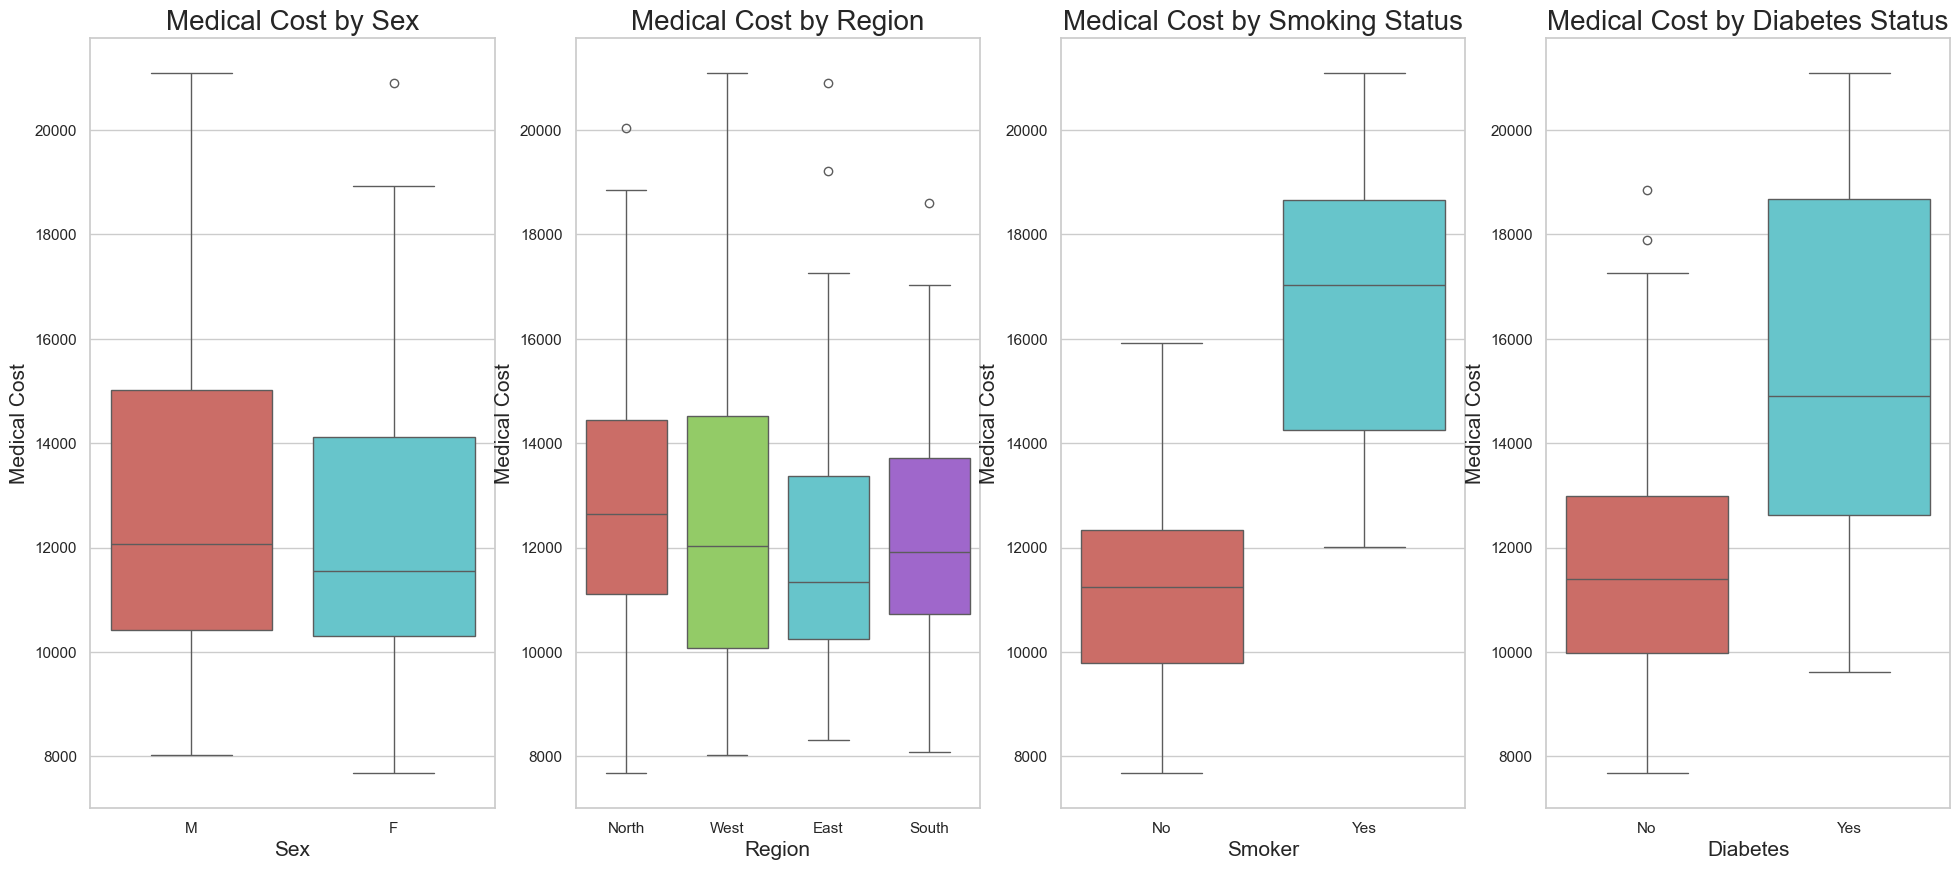

In [14]:
# boxplots for medical_cost by categorical variabls - sex, region, smoker, diabetes
sns.set(style="whitegrid")
plt.figure(figsize=(24,10))
plt.subplot(1,4,1)
sns.boxplot(x='sex',y='medical_cost',data=health_data, palette='hls', hue = 'sex')
plt.title('Medical Cost by Sex',fontsize=20)
plt.ylabel('Medical Cost',fontsize=15)
plt.xlabel('Sex',fontsize=15)
plt.subplot(1,4,2)
sns.boxplot(x='region',y='medical_cost',data=health_data, palette='hls', hue = 'region')
plt.title('Medical Cost by Region',fontsize=20)
plt.ylabel('Medical Cost',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.subplot(1,4,3)
sns.boxplot(x='smoker',y='medical_cost',data=health_data, palette='hls', hue = 'smoker')
plt.title('Medical Cost by Smoking Status',fontsize=20)
plt.ylabel('Medical Cost',fontsize=15)
plt.xlabel('Smoker',fontsize=15)
plt.subplot(1,4,4)
sns.boxplot(x='diabetes',y='medical_cost',data=health_data, palette='hls', hue = 'diabetes')
plt.title('Medical Cost by Diabetes Status',fontsize=20)
plt.ylabel('Medical Cost',fontsize=15)
plt.xlabel('Diabetes',fontsize=15)
plt.show()

## Model Building

### Data Preparation
Before building the model we need to convert the categorical data into numeric. We can do this manually or automatically using label encoder but for now let us use manual

- Sex - 1:M and 2:Female
- Region - 1:North, 2:South, 3:East, 4:West
- Smoker and Diabetes - No:0, Yes:1



In [15]:
# recode as explained above we use functions for each

# function to recode sex
def sex_recode(sex):
    if sex == 'M':
        return 1
    else:
        return 2

# function to recode region
def region_recode(region):
    if region == 'North':
        return 1
    elif region == 'South':
        return 2
    elif region == 'East':
        return 3
    else:
        return 4
    
# function to recode smoker and diabetes since all are Yes No we just make a function for both
def yes_no_recode(var_yn):
    if var_yn == 'Yes':
        return 1
    else:
        return 0


In [16]:
# apply the functions
health_data['sex'] = health_data['sex'].apply(sex_recode)
health_data['region'] = health_data['region'].apply(region_recode)
health_data['smoker'] = health_data['smoker'].apply(yes_no_recode)
health_data['diabetes'] = health_data['diabetes'].apply(yes_no_recode)
# check the fist 5 observations
health_data.head()

,age,bmi,blood_pressure,cholesterol_level,smoker,exercise_freq,diabetes,region,medical_cost,sex
0,58,30.8,154,203,0,3,0,1,12401.03,1
1,71,29.7,110,217,0,3,0,4,11387.86,1
2,48,39.2,155,182,0,4,0,3,12325.34,1
3,34,36.7,158,291,0,6,0,3,11256.32,2
4,62,34.6,116,170,0,3,0,3,11404.76,1


In [17]:
# confirmng that everyting is numeric
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                100 non-null    int64  
 1   bmi                100 non-null    float64
 2   blood_pressure     100 non-null    int64  
 3   cholesterol_level  100 non-null    int64  
 4   smoker             100 non-null    int64  
 5   exercise_freq      100 non-null    int64  
 6   diabetes           100 non-null    int64  
 7   region             100 non-null    int64  
 8   medical_cost       100 non-null    float64
 9   sex                100 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 7.9 KB


### Importing packages for linear regression

In [18]:
# importing packages for linear regression
from sklearn.model_selection import train_test_split # to perform cross validation
from sklearn.linear_model import LinearRegression # build the model
import statsmodels.api as sm # contains statistical functions
from scipy import stats # contains statistical functions
from sklearn import metrics # for model evaluation

### Split the data into train and test

In [19]:
# list the columns
health_data.columns

Index(['age', 'bmi', 'blood_pressure', 'cholesterol_level', 'smoker',
       'exercise_freq', 'diabetes', 'region', 'medical_cost', 'sex'],
      dtype='object')

In [20]:
# Select the features and target variable
X = health_data[['age', 'bmi', 'blood_pressure', 'cholesterol_level', 'smoker',
       'exercise_freq', 'diabetes', 'region', 'sex']]

y = health_data['medical_cost']

In [21]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Fit the linear model

In [22]:
# instantiate the model
lm = LinearRegression()

# build the model
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
# display the coeficients and p-values
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df.loc['Intercept'] = lm.intercept_

# Add a constant to the independent variables
X2 = sm.add_constant(X)

# Create a OLS model
model = sm.OLS(y, X2)

# Fit the model
est = model.fit()

# Get the p-values
p_values = est.pvalues

# Append the p-values to the coeff_df
coeff_df['p-value'] = p_values

coeff_df

,Coefficient,p-value
age,50.931797,3.456665e-10
bmi,190.316939,9.439142e-16
blood_pressure,14.437808,1.077885e-01
cholesterol_level,9.172930,4.096455e-04
smoker,5072.436633,6.631517e-35
exercise_freq,-77.330522,1.089312e-01
diabetes,2710.592232,9.019342e-17
region,-228.800955,4.845644e-02
sex,59.079945,3.849261e-01
Intercept,-311.513193,NaN


### Predictions and Model Evaluation

#### Prediction

In [24]:
# Generating the prediction
predictions = lm.predict(X_test)
y_test

83    13320.48
53    11060.49
70    18922.03
45    12817.01
44    18848.77
39    10316.14
22     9350.23
80    17256.52
10     9778.13
0     12401.03
18    13840.22
30     9385.22
73    14358.99
33    12072.34
90    11932.57
4     11404.76
76    11384.88
77     8580.59
12    13069.69
31     8729.30
55    13776.82
88    14027.85
26     8079.92
42     9581.00
69    10900.13
15     9104.66
40    11441.92
96    12719.29
9      9571.67
72    14812.01
Name: medical_cost, dtype: float64

Text(0.5, 1.0, 'Predicted vs Actual Values')

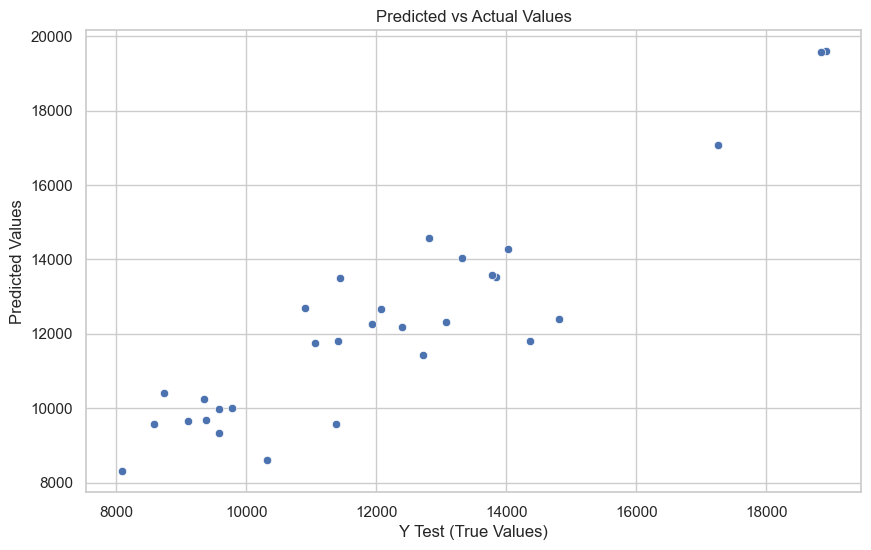

In [25]:
# generate a scatter plot for y_test vs the predictions
plt.figure(figsize=(10,6))

# Generate a scatter plot for y_test vs predictions
sns.scatterplot(x=y_test, y=predictions)

# Set the labels and title
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')

#### Plotting Residuals

Text(0.5, 1.0, 'Distribution of Residuals')

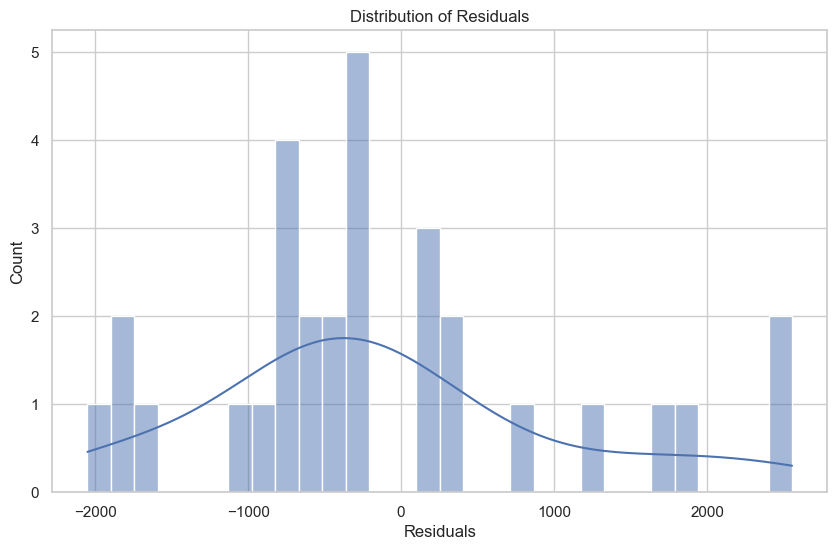

In [26]:
plt.figure(figsize=(10,6))

# Calculate the difference between the predicted and the actual values
residuals = y_test - predictions

# Generate a histogram with kde for the residuals
sns.histplot(residuals, kde=True, bins=30)

# Set the labels and title
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

#### Model Metrics

In [27]:
# Calculate the metrics for the model
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)

# create a dataframe of the metrics and print the model metrics
Metrics = [['MAE', 'MSE', 'RMSE', 'R Squared']]
met = pd.Series([MAE, MSE, RMSE, r_squared], index= Metrics)
met

MAE          8.974419e+02
MSE          1.315533e+06
RMSE         1.146967e+03
R Squared    8.307690e-01
dtype: float64